In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput
import decimal
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, zoomed_inset_axes

In [2]:
def range_decimal(start, stop, step, stop_inclusive=False):
    """ The Python range() function, using decimals.  A decimal loop_value generator.

    Note: The decimal math (addition) defines the rounding.

    If the stop is None, then:
        stop = start
        start = 0 (zero)

    If the step is 0 (zero) or None, then:
        if (stop < start) then step = -1 (minus one)
        if (stop >= start) then step = 1 (one)

    Example:
        for index in range_decimal(0, 1.0, '.1', stop_inclusive=True):
            print(index)

    :param start: The loop start value
    :param stop: The loop stop value
    :param step: The loop step value
    :param stop_inclusive: Include the stop value in the loop's yield generator: False = excluded ; True = included
    :return: The loop generator's yield increment value (decimal)
    """
    try:
        # Input argument(s) error check
        zero = decimal.Decimal('0')

        if start is None:
            start = zero

        if not isinstance(start, decimal.Decimal):
            start = decimal.Decimal(f'{start}')

        if stop is None:
            stop = start
            start = zero

        if not isinstance(stop, decimal.Decimal):
            stop = decimal.Decimal(f'{stop}')

        if step is None:
            step = decimal.Decimal('-1' if stop < start else '1')

        if not isinstance(step, decimal.Decimal):
            step = decimal.Decimal(f'{step}')

        if step == zero:
            step = decimal.Decimal('-1' if stop < start else '1')

        # Check for valid loop conditions
        if start == stop or (start < stop
                             and step < zero) or (start > stop
                                                  and step > zero):
            return  # Not valid: no loop

        # Case: increment step ( > 0 )
        if step > zero:
            while start < stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Case: decrement step ( < 0 )
        else:
            while start > stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Yield the stop value (inclusive)
        if stop_inclusive:
            yield stop

    except (ValueError, decimal.DecimalException) as ex:
        raise ValueError(f'{__name__}.range_decimal() error: {ex}')

In [3]:
sigma_list = np.linspace(0.1,10,100)

In [4]:
def plot_max(x, max_erg, max_ene, max_pow, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, max_erg, '-r', label='$\epsilon_{max}$')
    ax.plot(x, max_ene, '-b', label='$E_{max}$')
    ax.plot(x, max_pow, '-m', label='$P_{max}$')
    
    ax.set_xlim(x[0],x[-1])
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_ylim(0)
    
    ax.set_title('Input pulse state: ' + title)
    ax.legend()
    
    return ax

In [5]:
source_dir = "../../outputs/gaussian/max/"

max_erg_squeezed_r = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/ergotropy*.dat"))))
max_ene_squeezed_r = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/energy*.dat"))))
max_pow_squeezed_r = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/power*.dat"))))

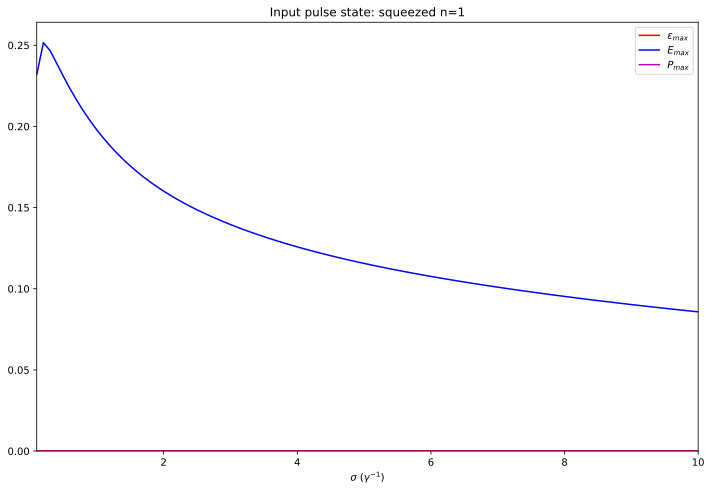

In [6]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg=max_erg_squeezed_r, max_ene=max_ene_squeezed_r, max_pow=max_pow_squeezed_r, 
         title='squeezed n=1', ax=axes)

plt.tight_layout()
plt.show()

In [7]:
max_erg_squeezed_mr = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/precision_0.001/ergotropy*.dat"))))
max_ene_squeezed_mr = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/precision_0.001/energy*.dat"))))
max_pow_squeezed_mr = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "squeezed_1/precision_0.001/power*.dat"))))

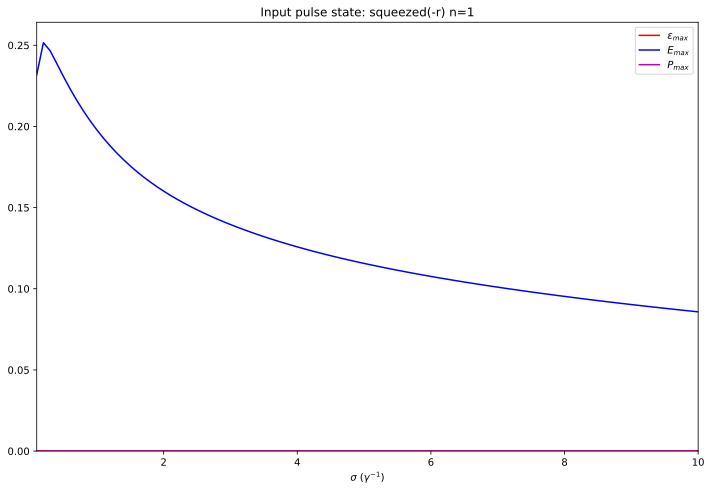

In [8]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(sigma_list, max_erg=max_erg_squeezed_mr, max_ene=max_ene_squeezed_mr, max_pow=max_pow_squeezed_mr, 
         title='squeezed(-r) n=1', ax=axes)

plt.tight_layout()
plt.show()

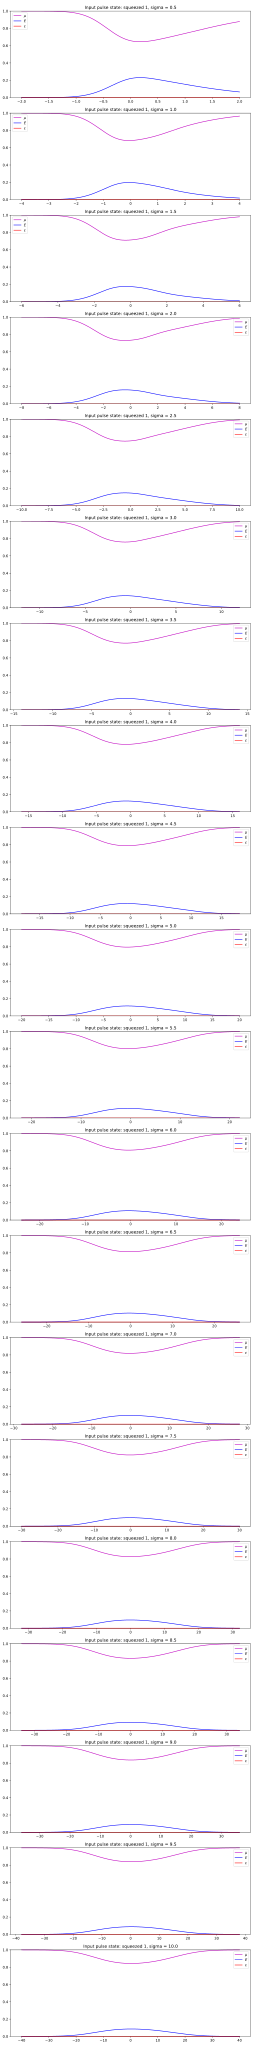

In [10]:
fig, ax = plt.subplots(20, figsize=(10,80))
#fig.set_figheight(10)
#fig.set_figwidth(40)
source_dir = "../../outputs/gaussian/"

for i, sigma in zip(range(0,20,1), range_decimal(0.5,10.0,0.5,stop_inclusive=True)):
    squeezed_pur = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_" + 
                              str(sigma) + "/purity_" + str(sigma) + ".dat")
    squeezed_erg = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_" + 
                              str(sigma) + "/ergotropy_" + str(sigma) + ".dat")
    squeezed_ene = np.loadtxt(source_dir + 
                          "fixed_sigma/squeezed_1/precision_0.001/sigma_" + 
                              str(sigma) + "/energy_" + str(sigma) + ".dat")
    ax[i].plot(squeezed_pur[:,0], squeezed_pur[:,1], '-m', label='$\mu$')
    ax[i].plot(squeezed_ene[:,0], squeezed_ene[:,1], '-b', label='$E$')
    ax[i].plot(squeezed_erg[:,0], squeezed_erg[:,1], '-r', label='$\epsilon$')

    #ax.set_xlim(0,15)
    ax[i].set_ylim(0,1)

    ax[i].set_title("Input pulse state: squeezed 1, sigma = " + str(sigma))

    ax[i].legend()

plt.tight_layout()
plt.show()